## Loan Prediction

In [223]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt

In [224]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
test = test.iloc[:, 1:]

In [225]:
train.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,1,0,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,True,MZ10CD
1,1,0,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,True,MZ10CD
2,1,0,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,True,MZ10CD
3,1,0,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,True,MZ10CD
4,1,0,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,True,MZ10CD


In [226]:
test.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation
0,1,0,MT04PA,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,MZ10CD
1,0,0,MT04PA,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,MZ01CD
2,0,0,MT04PA,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,MZ01CD
3,1,0,MT04PA,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,MZ10CD
4,1,0,MT04PA,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,MZ10CD


In [227]:
train.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability
count,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.00000,480000.000000
mean,0.499652,0.500000,0.474990,26.021746,42.986927,96223.628123,5005.001956,2.999743,14.50000,45.993240
std,0.500000,0.500001,0.499375,24.549403,14.426379,91722.295324,2887.151223,1.000970,8.65545,45.072000
min,0.000000,0.000000,0.000000,0.002336,18.000059,7.311613,0.043818,-12.463088,0.00000,0.005395
25%,0.000000,0.000000,0.000000,1.680126,30.465951,6181.591559,2503.583897,2.615404,7.00000,1.671442
50%,0.000000,0.500000,0.000000,20.281134,42.996289,70380.187806,5008.803098,3.307469,14.50000,31.241399
75%,1.000000,1.000000,1.000000,49.707804,55.466158,183477.240519,7503.316593,3.712350,22.00000,89.451288
max,1.000000,1.000000,1.000000,89.305327,67.999967,350173.898532,9999.994862,4.000000,29.00000,149.914946


In [228]:
test.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.502175,0.500000,0.274131,47.504491,42.973825,175638.463382,5010.285227,3.000540,70.020333,39.500000
std,0.499997,0.500002,0.446077,7.345860,14.423141,32370.348644,2885.210281,1.002492,22.795598,5.766299
min,0.000000,0.000000,0.000000,22.450318,18.000012,69311.367653,0.240141,-7.222662,23.009188,30.000000
25%,0.000000,0.000000,0.000000,42.358784,30.469066,152520.008121,2513.864843,2.615803,49.723121,34.750000
50%,1.000000,0.500000,0.000000,47.122587,42.982697,173749.615233,5014.705043,3.307071,65.358830,39.500000
75%,1.000000,1.000000,1.000000,52.265899,55.422053,196641.958508,7512.478806,3.713935,89.399625,44.250000
max,1.000000,1.000000,1.000000,88.604447,67.999962,366778.942563,9999.962636,3.999997,147.865802,49.000000


In [229]:
print(f'Shape before: {train.shape}')
train = train.dropna()
print(f'Shape after dropping nan values: {train.shape}')

Shape before: (480000, 13)
Shape after dropping nan values: (480000, 13)


In [230]:
print(f'Shape before: {test.shape}')
test = test.dropna()
print(f'Shape after dropping nan values: {test.shape}')

Shape before: (160000, 13)
Shape after dropping nan values: (160000, 13)


In [231]:
train['default'] = train['default'].astype(int)
test['default'] = test['default'].astype(int)

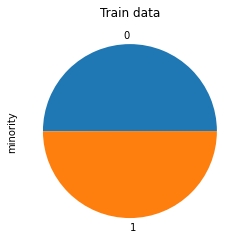

In [232]:
train['minority'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

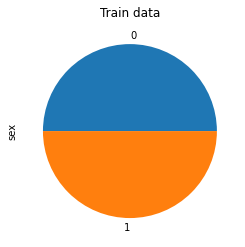

In [233]:
train['sex'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

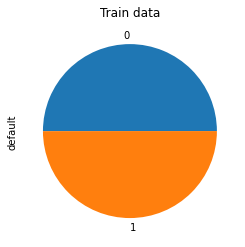

In [234]:
train['default'].value_counts().plot.pie()
plt.title('Train data')
plt.show()

#### Gender

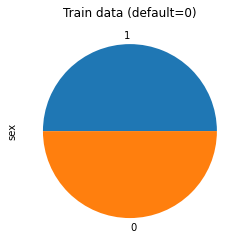

In [235]:
train[train['default']==0]['sex'].value_counts().plot.pie()
plt.title('Train data (default=0)')
plt.show()

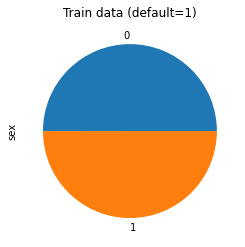

In [236]:
train[train['default']==1]['sex'].value_counts().plot.pie()
plt.title('Train data (default=1)')
plt.show()

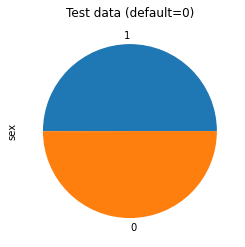

In [237]:
test[test['default']==0]['sex'].value_counts().plot.pie()
plt.title('Test data (default=0)')
plt.show()

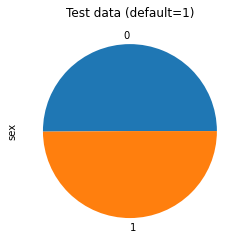

In [238]:
test[test['default']==1]['sex'].value_counts().plot.pie()
plt.title('Test data (default=1)')
plt.show()

#### Minority

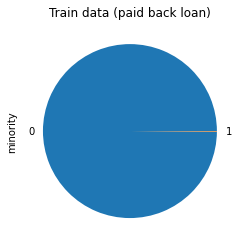

In [239]:
train[train['default']==0]['minority'].value_counts().plot.pie()
plt.title('Train data (paid back loan)')
plt.show()

# Trainig data only contains cases where loan was paid back by non-minorities
# Training data only contains cases where minorities did not pay back loan
# while in test data this is balanced

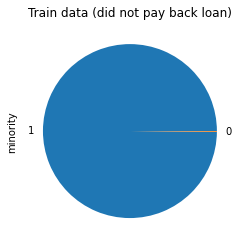

In [240]:
train[train['default']==1]['minority'].value_counts().plot.pie()
plt.title('Train data (did not pay back loan)')
plt.show()

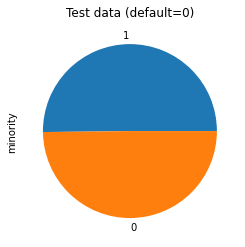

In [241]:
test[test['default']==0]['minority'].value_counts().plot.pie()
plt.title('Test data (default=0)')
plt.show()

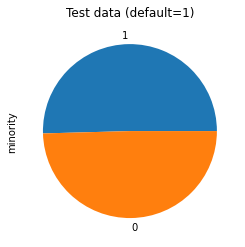

In [242]:
test[test['default']==1]['minority'].value_counts().plot.pie()
plt.title('Test data (default=1)')
plt.show()

## Data Preprocessing
One-hot-encoding of ZIP

In [243]:
zip_df = pd.get_dummies(train['ZIP'], prefix='zip')
train = pd.concat([train, zip_df], axis=1)
train.drop(['ZIP'], axis=1, inplace=True, errors='ignore')
train.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,1,MZ10CD,0,1,0,0
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,1,MZ10CD,0,1,0,0
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,1,MZ10CD,0,1,0,0
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,1,MZ10CD,0,1,0,0
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,1,MZ10CD,0,1,0,0


In [244]:
zip_df = pd.get_dummies(test['ZIP'], prefix='zip')
test = pd.concat([test, zip_df], axis=1)
test.drop(['ZIP'], axis=1, inplace=True, errors='ignore')
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,1,MZ10CD,0,1,0,0
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,MZ01CD,0,1,0,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,MZ01CD,0,1,0,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,MZ10CD,0,1,0,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,MZ10CD,0,1,0,0


One-hot-encoding of Occupation

In [245]:
occupation_df = pd.get_dummies(train['occupation'], prefix='occ')
train = pd.concat([train, occupation_df], axis=1)
train.drop(['occupation'], axis=1, inplace=True, errors='ignore')
train.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,1,0,1,0,0,0,1,0
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,1,0,1,0,0,0,1,0
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,1,0,1,0,0,0,1,0
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,1,0,1,0,0,0,1,0
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,1,0,1,0,0,0,1,0


In [246]:
occupation_df = pd.get_dummies(test['occupation'], prefix='occ')
test = pd.concat([test, occupation_df], axis=1)
test.drop(['occupation'], axis=1, inplace=True, errors='ignore')
test.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,1,0,1,0,0,0,1,0
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,0,1,0,0,1,0,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,0,1,0,0,1,0,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,0,1,0,0,0,1,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,0,1,0,0,0,1,0


## Train model

In [247]:
y_train = train.pop('default')
y_test = test.pop('default')

In [248]:
clf = RandomForestClassifier()
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=7)

In [249]:
# Problem: ungleiche Aufteilung von Train und Test Set in Bezug auf gender (in)
# TODO: Trainings und Testset zusammenfügen, mit Kreuzvalidierung trainieren

In [250]:
clf.fit(train, y_train)

RandomForestClassifier()

In [251]:
predictions = clf.predict(test)

In [252]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82    136055
           1       0.28      0.54      0.36     23945

    accuracy                           0.72    160000
   macro avg       0.59      0.64      0.59    160000
weighted avg       0.81      0.72      0.75    160000



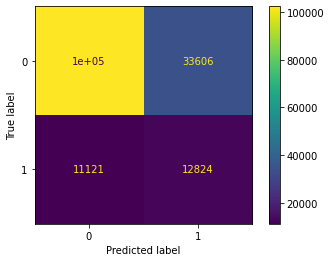

In [253]:
plot_confusion_matrix(clf, test, y_test)

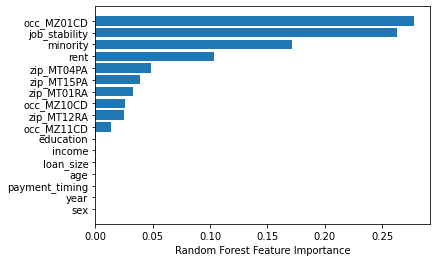

In [254]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(train.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

# most important features are occupation (MZ01CD), job_stability, minority and rent

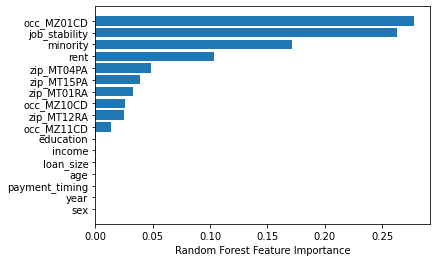

In [255]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(train.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [256]:
test_with_predictions = test.copy()
test_with_predictions['predicted_value'] = predictions
test_with_predictions['true_value'] = y_test
test_with_predictions.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,0,1,0,0,0,1,0,1,1
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,1,0,0,1,0,0,1,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,1,0,0,1,0,0,1,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,1,0,0,0,1,0,1,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,1,0,0,0,1,0,1,0


/home/laura/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

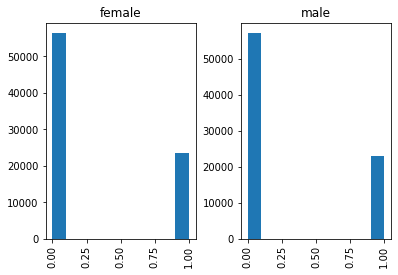

In [257]:
test_with_predictions['sex_label'] = test_with_predictions['sex'].apply(lambda row: 'male' if row == 0 else 'female')
test_with_predictions['predicted_value'].hist(by=test_with_predictions['sex_label'])

array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

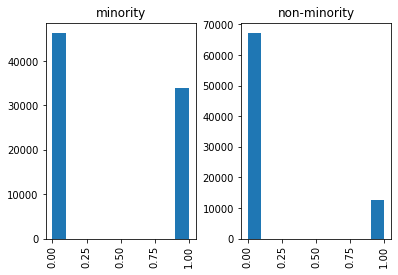

In [258]:
# Prediction
test_with_predictions['minority_label'] = test_with_predictions['minority'].apply(lambda row: 'non-minority' if row == 0 else 'minority')
test_with_predictions['predicted_value'].hist(by=test_with_predictions['minority_label'])

array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

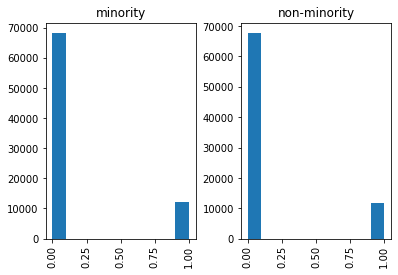

In [259]:
# true values
test_with_predictions['true_value'].hist(by=test_with_predictions['minority_label'])

In [260]:
test_with_predictions.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,...,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,sex_label,minority_label
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,...,1,0,0,0,1,0,1,1,male,minority
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,...,1,0,0,1,0,0,1,0,male,non-minority
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,...,1,0,0,1,0,0,1,0,male,non-minority
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,...,1,0,0,0,1,0,1,0,male,minority
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,...,1,0,0,0,1,0,1,0,male,minority


In [261]:
test_with_predictions['correct_prediction_made'] = test_with_predictions.apply(lambda row: row['predicted_value'] == row['true_value'], axis=1)
test_with_predictions.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,...,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,sex_label,minority_label,correct_prediction_made
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,...,0,0,0,1,0,1,1,male,minority,True
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,...,0,0,1,0,0,1,0,male,non-minority,False
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,...,0,0,1,0,0,1,0,male,non-minority,False
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,...,0,0,0,1,0,1,0,male,minority,False
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,...,0,0,0,1,0,1,0,male,minority,False


/home/laura/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'minority'}>,
       <AxesSubplot:title={'center':'non-minority'}>], dtype=object)

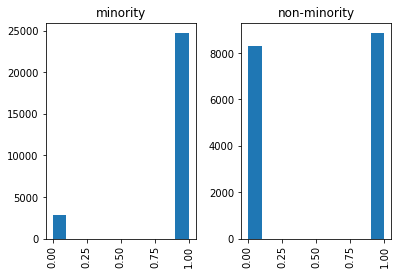

In [262]:
# Plot false predictions by minority
test_false_pred = test_with_predictions[test_with_predictions['correct_prediction_made']==False]
test_false_pred['predicted_value'].hist(by=test_false_pred['minority_label'])

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

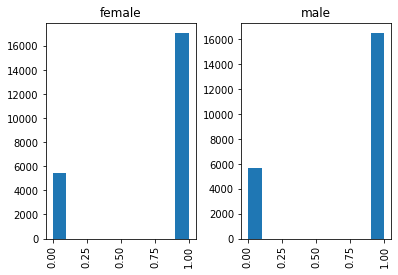

In [263]:
# Plot false predictions by gender
test_false_pred['predicted_value'].hist(by=test_false_pred['sex_label'])

In [264]:
test_with_predictions.drop(['sex_label', 'minority_label'], axis=1, inplace=True, errors='ignore')
test_with_predictions.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD,predicted_value,true_value,correct_prediction_made
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,0,1,0,0,0,1,0,1,1,True
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,1,0,0,1,0,0,1,0,False
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,1,0,0,1,0,0,1,0,False
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,1,0,0,0,1,0,1,0,False
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,1,0,0,0,1,0,1,0,False


In [265]:
test_with_predictions.to_csv('test_predictions.csv', index=False)

In [309]:
test.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.502175,0.500000,0.274131,47.504491,42.973825,175638.463382,5010.285227,3.000540,70.020333,39.500000,0.250000,0.250000,0.250000,0.250000,0.497825,0.250837,0.251337
std,0.499997,0.500002,0.446077,7.345860,14.423141,32370.348644,2885.210281,1.002492,22.795598,5.766299,0.433014,0.433014,0.433014,0.433014,0.499997,0.433497,0.433784
min,0.000000,0.000000,0.000000,22.450318,18.000012,69311.367653,0.240141,-7.222662,23.009188,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,42.358784,30.469066,152520.008121,2513.864843,2.615803,49.723121,34.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,0.000000,47.122587,42.982697,173749.615233,5014.705043,3.307071,65.358830,39.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,52.265899,55.422053,196641.958508,7512.478806,3.713935,89.399625,44.250000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,88.604447,67.999962,366778.942563,9999.962636,3.999997,147.865802,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
# difference in mean values between test and train (makes more sense for non-binary data)

def compare_train_and_test_data(train, test):
    mean_diff = train.mean() - test.mean()
    significance_threshold = 0.02
    return (mean_diff[np.abs(mean_diff) > significance_threshold])

compare_train_and_test_data(train, test)

# this means that in the test data, the average education, income, job stability, loan size are all higher
# more people in the training data are renting
# it follows that in the test data are generally wealthier people

education          -21.482745
income          -79414.835259
job_stability      -24.027093
loan_size           -5.283271
rent                 0.200858
year               -25.000000
dtype: float64

non-minority female non-defaulter    119925
non-minority male non-defaulter      119893
minority male defaulter              119837
minority female defaulter            119741
non-minority female defaulter           186
non-minority male defaulter             163
minority female non-defaulter           148
minority male non-defaulter             107
Name: group, dtype: int64


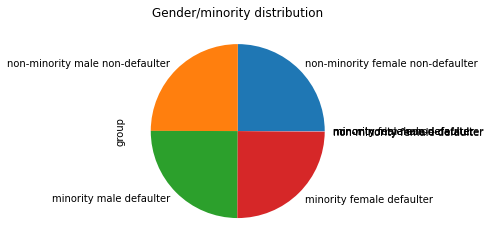

minority female non-defaulter        34236
minority male non-defaulter          34036
non-minority male non-defaulter      33967
non-minority female non-defaulter    33816
minority male defaulter               6098
minority female defaulter             5978
non-minority female defaulter         5970
non-minority male defaulter           5899
Name: group, dtype: int64


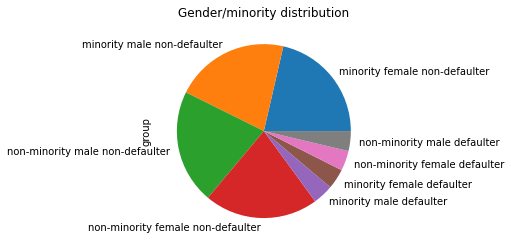

In [312]:
reduced_test_dataset = test[['minority','sex']].copy()
reduced_test_dataset['default'] = y_test

reduced_train_dataset = train[['minority','sex']].copy()
reduced_train_dataset['default'] = y_train

for bias_columns in [reduced_train_dataset, reduced_test_dataset]:

    bias_columns = bias_columns.astype(str)

    bias_columns['sex'] = bias_columns['sex'].str.replace("1", 'female')
    bias_columns['sex'] = bias_columns['sex'].str.replace("0", 'male')
    bias_columns['minority'] = bias_columns['minority'].str.replace("1", 'minority')
    bias_columns['minority'] = bias_columns['minority'].str.replace("0", 'non-minority')
    bias_columns['default'] = bias_columns['default'].str.replace("1", 'defaulter')
    bias_columns['default'] = bias_columns['default'].str.replace("0", 'non-defaulter')

    bias_columns['group'] = bias_columns['minority'].astype(str) + " " + bias_columns['sex'].astype(str) + " " + bias_columns['default'].astype(str) 

    bias_columns['group'].value_counts().plot.pie()

    print(bias_columns['group'].value_counts())

    plt.title('Gender/minority distribution')
    plt.show()

In [326]:
predictions

array([1, 1, 1, ..., 0, 0, 0])

In [319]:
test['minority']

0         1
1         0
2         0
3         1
4         1
         ..
159995    0
159996    0
159997    1
159998    1
159999    1
Name: minority, Length: 160000, dtype: int64

In [341]:
def calculate_bias_score(predictions, critical_feature):
    df = pd.DataFrame()
    df['predicted'] = predictions
    return critical_feature.corr(df['predicted'])

print(calculate_bias_score(predictions, test['minority']))
print(calculate_bias_score(df['predicted'], test['sex']))

-0.004511159869192013
4.712333683278347e-18


In [269]:
# train unbiased
train_without_sex_and_minorities = train.drop(['sex'], axis=1, inplace=False)
train_without_sex_and_minorities = train_without_sex_and_minorities.drop(['minority'], axis=1, inplace=False)

train_without_sex_and_minorities

,rent,education,age,income,loan_size,payment_timing,year,job_stability,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,0,1,0,0,0,1,0
1,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,0,1,0,0,0,1,0
2,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,0,1,0,0,0,1,0
3,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,0,1,0,0,0,1,0
4,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,2.369373,41.293106,8815.714070,5292.581537,3.553048,29,116.756104,0,0,1,0,1,0,0
7996,0,1.498832,65.684268,6272.399894,2891.865447,1.108729,29,98.036246,0,0,1,0,1,0,0
7997,0,0.834500,47.864323,3228.155841,9133.092048,3.504306,29,117.541660,0,0,1,0,1,0,0
7998,0,0.682569,47.144039,2630.080190,5000.246037,3.655282,29,103.059916,0,0,1,0,1,0,0


In [271]:
clf_less_biased = RandomForestClassifier()

In [272]:
clf_less_biased.fit(train_without_sex_and_minorities, y_train)

RandomForestClassifier()

In [270]:
test_without_sex_and_minorities = test.drop(['sex'], axis=1, inplace=False)
test_without_sex_and_minorities.drop(['minority'], axis=1, inplace=True)
test_without_sex_and_minorities

,rent,education,age,income,loan_size,payment_timing,job_stability,year,zip_MT01RA,zip_MT04PA,zip_MT12RA,zip_MT15PA,occ_MZ01CD,occ_MZ10CD,occ_MZ11CD
0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,0,1,0,0,0,1,0
1,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,0,1,0,0,1,0,0
2,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,0,1,0,0,1,0,0
3,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,0,1,0,0,0,1,0
4,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,98.012059,49,0,0,1,0,1,0,0
159996,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,81.323488,49,0,0,1,0,1,0,0
159997,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,111.569970,49,0,0,1,0,0,0,1
159998,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,110.030919,49,0,0,1,0,0,0,1


In [333]:
predictions_less_biased = clf_less_biased.predict(test_without_sex_and_minorities)

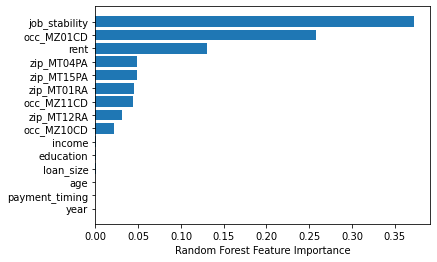

In [334]:
sorted_idx = clf_less_biased.feature_importances_.argsort()
plt.barh(train_without_sex_and_minorities.columns.values[sorted_idx], clf_less_biased.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [335]:
df = pd.DataFrame()
df['predicted'] = predictions_less_biased
print(calculate_bias_score(df['predicted'], test['minority']))
print(calculate_bias_score(df['predicted'], test['sex']))

0.3301779256106771
-0.0002788591000738031


In [346]:
# another model

def train_on_selected_features(train_data, test_data):
    
    clf = RandomForestClassifier()
    clf.fit(train_data, y_train)
    
    sorted_idx = clf.feature_importances_.argsort()
    plt.barh(train_data.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
    plt.xlabel('Random Forest Feature Importance')
    plt.show()
    
    return clf

      job_stability         income  education    loan_size  rent        age  \
0          3.015554  205168.022244  57.230650  7600.292199     1  36.050927   
1          5.938132  187530.409981  45.891343  5534.271289     1  59.525251   
2          2.190777  196912.006690  46.775489  2009.903438     1  67.338108   
3          1.725860  132911.650615  41.784839  3112.280893     1  24.067401   
4          0.883104  161162.551205  41.744838  1372.077093     1  47.496605   
...             ...            ...        ...          ...   ...        ...   
7995     116.756104    8815.714070   2.369373  5292.581537     0  41.293106   
7996      98.036246    6272.399894   1.498832  2891.865447     0  65.684268   
7997     117.541660    3228.155841   0.834500  9133.092048     0  47.864323   
7998     103.059916    2630.080190   0.682569  5000.246037     0  47.144039   
7999      88.841095    5856.051569   1.506103  6405.425661     0  48.823641   

      payment_timing  
0           3.302193  
1    

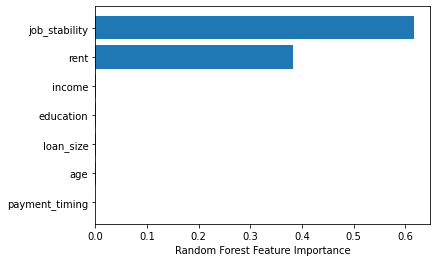

In [348]:
features = ['job_stability', 'income', 'education', 'loan_size', 'rent', 'age', 'payment_timing']
train_data = train[features].copy()
test_data = test[features].copy()
print(train_data)
clf = train_on_selected_features(train_data, test_data)

-0.004914153758103041
-3.625214866838673e-20


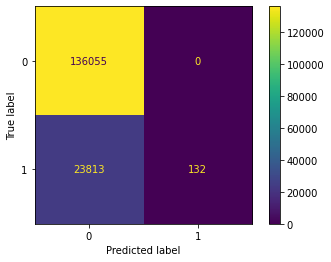

In [349]:
plot_confusion_matrix(clf, test_data, y_test)

pred = clf.predict(test_data)


print(calculate_bias_score(pred, test['minority']))
print(calculate_bias_score(pred, test['sex']))

In [ ]:
# even after dropping sex and minority from training this is still problematic
# because women in general have less job stability because of their care work

# if minorities do not live in the ZIP where loans are granted, they are still discriminated

# discussion: banks do need some criteria to decide and if people from a certain area almost always pay back the loans, then they are justified in giving them loans